In [1]:
import time
start_time=time.time()

In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
import pandas as pd
import math
import sys
import os
from PIL import Image
import seaborn as sns
from downsample import downsample


In [3]:
#ARCHIVO
reg='595'
FitsFile= 'Obs/TAURUS.595.Ha.Sigma'
hdul=fits.open(FitsFile + '.fits')

Text(0.5, 1.0, 'H$_{α}$ σ$_{disp}$')

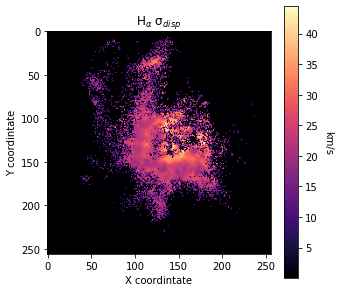

In [4]:
#IMAGEN
fig, ax = plt.subplots(figsize=(5, 5))


image_data=hdul[0].data
plt.imshow(image_data, cmap='magma')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
cbar = plt.colorbar()
cbar.set_label('km/s', rotation=270, labelpad=15)  
plt.title('H$_{α}$ σ$_{disp}$')
#plt.savefig('TAURUS/'+reg+'SH.png')


In [5]:
#TABLA DATOS
sig=hdul[0].data
df=pd.DataFrame(sig)

In [6]:
dsig=df.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'Sig'})
dsig.describe()

,X,Y,Sig
count,65536.000000,65536.000000,6.553600e+04
mean,127.500000,127.500000,3.881712e+00
std,73.900834,73.900834,9.424380e+00
min,0.000000,0.000000,1.111131e-08
25%,63.750000,63.750000,1.111131e-08
50%,127.500000,127.500000,1.111131e-08
75%,191.250000,191.250000,1.111131e-08
max,255.000000,255.000000,4.444924e+01


In [7]:
#ARCHIVO
FitsFile= 'Obs/TAURUS.595.Ha.Flux'
hdul=fits.open(FitsFile + '.fits')

Text(0.5, 1.0, 'H$_{α}$ Flux')

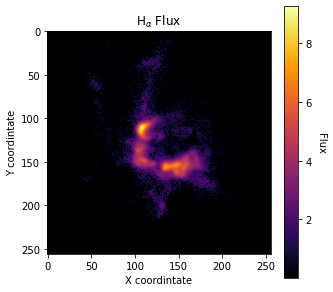

In [8]:
#IMAGEN
fig, ax = plt.subplots(figsize=(5, 5))


image_data=hdul[0].data
plt.imshow(image_data, cmap='inferno')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
cbar = plt.colorbar()
cbar.set_label('Flux', rotation=270, labelpad=15)  
plt.title('H$_{α}$ Flux')
#plt.savefig('TAURUS/'+reg+'FH.png')

In [9]:
#TABLA DATOS
flx=hdul[0].data
df=pd.DataFrame(flx)

In [10]:
dffx=df.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'I'})
dffx.describe()

,X,Y,I
count,65536.000000,65536.000000,6.553600e+04
mean,127.500000,127.500000,2.822382e-01
std,73.900834,73.900834,8.645264e-01
min,0.000000,0.000000,2.314902e-09
25%,63.750000,63.750000,2.314902e-09
50%,127.500000,127.500000,2.314902e-09
75%,191.250000,191.250000,2.314902e-09
max,255.000000,255.000000,9.260010e+00


In [11]:
#ARCHIVO
FitsFile= 'Obs/TAURUS.595.Ha.RV'
#FitsFile= 'n604halphasigma'
hdul=fits.open(FitsFile + '.fits')

Text(0.5, 1.0, 'H$_{α}$ Radial Velocity')

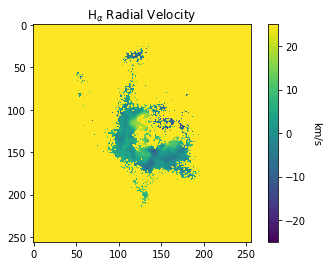

In [12]:
#IMAGEN
image_data=hdul[0].data
plt.imshow(image_data, cmap='viridis')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
cbar = plt.colorbar()
cbar.set_label('km/s', rotation=270, labelpad=15)  
plt.clim(-25,25) 
plt.title('H$_{α}$ Radial Velocity')

#plt.savefig('TAURUS/'+reg+'RVH.png')

In [13]:
#TABLA DATOS
vel=hdul[0].data
df=pd.DataFrame(vel)
#dfv=df.stack()
#dfv

In [14]:
dfvr=df.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'RV'})
dfvr.describe()

,X,Y,RV
count,65536.000000,65536.000000,65536.000000
mean,127.500000,127.500000,290.868363
std,73.900834,73.900834,120.844926
min,0.000000,0.000000,-25.025787
25%,63.750000,63.750000,341.519989
50%,127.500000,127.500000,341.519989
75%,191.250000,191.250000,341.519989
max,255.000000,255.000000,341.519989


In [15]:
data=dfvr
data['I']=dffx.I
data['Sig']=dsig.Sig
data.describe()

,X,Y,RV,I,Sig
count,65536.000000,65536.000000,65536.000000,6.553600e+04,6.553600e+04
mean,127.500000,127.500000,290.868363,2.822382e-01,3.881712e+00
std,73.900834,73.900834,120.844926,8.645264e-01,9.424380e+00
min,0.000000,0.000000,-25.025787,2.314902e-09,1.111131e-08
25%,63.750000,63.750000,341.519989,2.314902e-09,1.111131e-08
50%,127.500000,127.500000,341.519989,2.314902e-09,1.111131e-08
75%,191.250000,191.250000,341.519989,2.314902e-09,1.111131e-08
max,255.000000,255.000000,341.519989,9.260010e+00,4.444924e+01


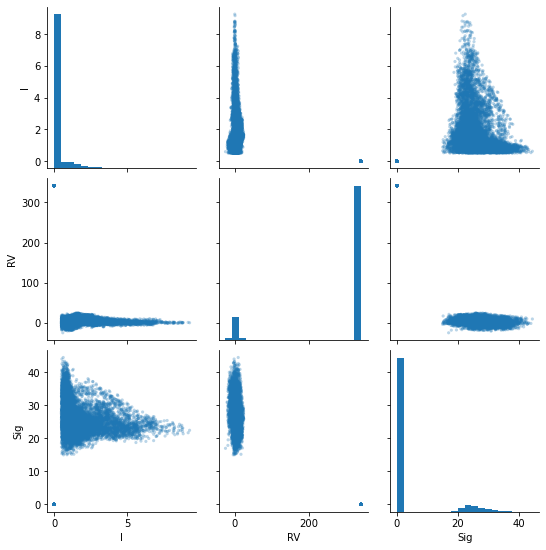

In [16]:
sns.pairplot(data, 
             vars=["I","RV","Sig"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

In [17]:
mI=data.I>data.I.mean()+0.5*data.I.std()
data=data[mI]


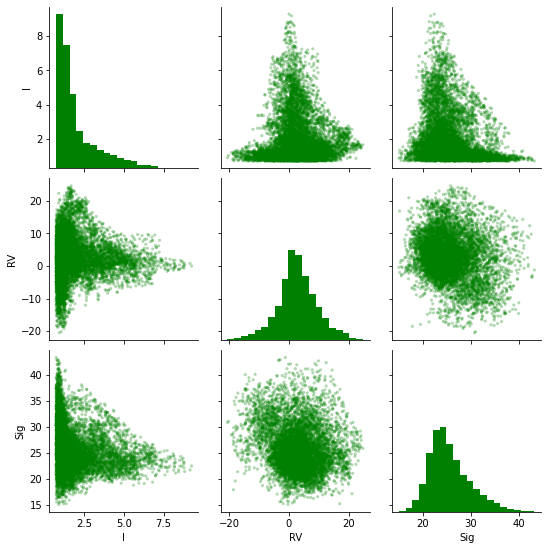

In [18]:
sns.pairplot(data, 
             vars=["I","RV","Sig"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none', color="green"),
             diag_kws=dict(bins=20, color="green"),
            )

#plt.savefig('TAURUS/'+reg+'CorrlHA.png')

In [19]:
data.describe()

,X,Y,RV,I,Sig
count,8765.000000,8765.000000,8765.000000,8765.000000,8765.000000
mean,129.266743,130.180947,2.821943,2.037856,25.628524
std,41.247226,31.236183,6.643250,1.409344,4.291403
min,11.000000,38.000000,-20.539368,0.714868,15.030182
25%,105.000000,110.000000,-0.919708,1.061956,22.650513
50%,136.000000,127.000000,2.495300,1.508847,24.844576
75%,159.000000,153.000000,6.669220,2.504355,27.989908
max,217.000000,205.000000,24.659454,9.260010,43.284180


Text(0.5, 1.0, 'H$_{α}$ Flux')

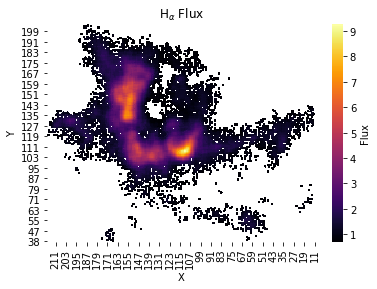

In [20]:
datal=data.copy()
#datal.I=np.log10(datal.I)
datal.X=datal.X.astype(int)
dataH_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
#fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(dataH_f, cmap="inferno",xticklabels='auto',cbar_kws={'label': 'Flux'})
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.title('H$_{α}$ Flux')
#plt.savefig('TAURUS/Imgs/A/'+reg+'FH.png')

Text(0.5, 1.0, 'H$_{α}$ Radial Velocity')

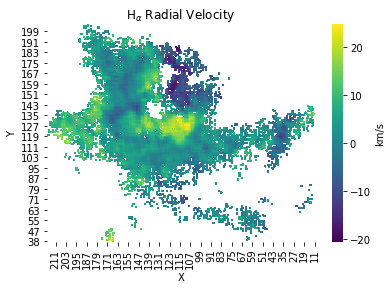

In [21]:
datal=data.copy()
dataH_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
sns.heatmap(dataH_rv, cmap="viridis",cbar_kws={'label': 'km/s'})
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.title('H$_{α}$ Radial Velocity')
#plt.savefig('TAURUS/Imgs/A/'+reg+'RVH.png')

In [22]:
#dx,sfH0=sosf(data)
#sfnH00=sosfnorm(df)
#sfwH00=sosfw(df)
#sfw2H00=sosfw2(df)
#afH00=acf(df)
#psH00=ps(df)
#pstH00=pst(df)
#sfhH0=sfwh(data)

Text(0.5, 1.0, 'H$_{α}$ σ$_{disp}$')

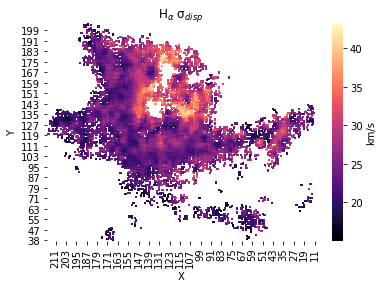

In [23]:
datal=data.copy()
dataH_s=(datal.round(2)).pivot(index='Y', columns='X', values='Sig')
sns.heatmap(dataH_s, cmap="magma",cbar_kws={'label': 'km/s'})
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.title('H$_{α}$ σ$_{disp}$')
#plt.savefig('TAURUS/Imgs/A/'+reg+'SH.png')

In [24]:
data.Sig=(data.Sig**2-9.87**2-14.5**2)**0.5

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Text(0, 0.5, '$σ_{disp}$ [km/s]')

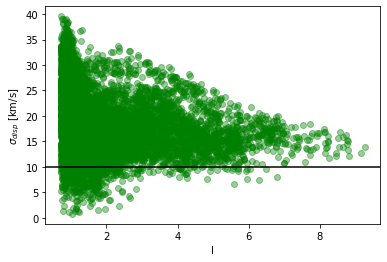

In [25]:
fig, ax = plt.subplots()
plt.scatter(data.I,data.Sig,alpha=0.4, color='green')
#plt.title(LineN[i])

plt.axhline(y=10, color='k', linestyle='-')
#plt.axhline(y=22.5, color='k', linestyle='--')
#plt.axhline(y=25.6, color='k', linestyle='-.')
#plt.axhline(y=12, color='k', linestyle=':')

ax.set_xlabel('I')
ax.set_ylabel('$σ_{disp}$ [km/s]')

In [26]:
mingoods=[1]

In [27]:
I=dataH_f.copy()
I=np.array(I)
m=pd.notna(I)

In [28]:
for mingood in zip(mingoods):
    [I],m= downsample([I],m,weights=None,mingood=mingood)

In [29]:
RV=dataH_rv.copy()
RV=np.array(RV)
m=pd.notna(RV)

In [30]:
for mingood in zip(mingoods):
    [RV],m= downsample([RV],m,weights=None,mingood=mingood)

In [31]:
Sg=dataH_s.copy()
Sg=np.array(Sg)
m=pd.notna(Sg)

In [32]:
for mingood in zip(mingoods):
    [Sg],m= downsample([Sg],m,weights=None,mingood=mingood)

In [33]:
Ip=pd.DataFrame(I)
dfi=Ip.stack().reset_index().rename(columns={'level_0':'Y', 'level_1':'X', 0:'I'})

RVp=pd.DataFrame(RV)
dfrv=RVp.stack().reset_index().rename(columns={'level_0':'Y', 'level_1':'X', 0:'RV'})

Sgp=pd.DataFrame(Sg)
dfs=Sgp.stack().reset_index().rename(columns={'level_0':'Y', 'level_1':'X', 0:'Sig'})


df=pd.concat([dfrv,dfi.I, dfs.Sig],axis=1)
df.describe()

,Y,X,RV,I,Sig
count,6428.000000,6428.000000,6428.000000,6428.000000,6428.000000
mean,40.561917,50.013690,0.550572,0.514172,4.694038
std,25.324342,31.046758,2.878655,1.263623,10.033930
min,0.000000,0.000000,-17.537500,0.000000,0.000000
25%,18.000000,22.000000,0.000000,0.000000,0.000000
50%,40.000000,49.000000,0.000000,0.000000,0.000000
75%,63.000000,77.000000,0.000000,0.000000,0.000000
max,82.000000,102.000000,23.342500,8.965000,40.832500


In [34]:
#mx=(df.X<40)&(df.X>4)
#df=df[mx]

#my=(df.Y<55)&(df.Y>10)
#df=df[my]

mI=df.I>df.I.mean()+1.0*df.I.std()
df=df[mI]

#ms=(df.Sig>0)
#df=df[ms]

df.describe()

,Y,X,RV,I,Sig
count,814.000000,814.000000,814.000000,814.000000,814.000000
mean,45.855037,65.545455,2.874367,3.437816,24.728415
std,12.009677,11.181485,5.143642,1.409502,3.115149
min,27.000000,36.000000,-11.740000,1.780000,17.605000
25%,36.000000,57.000000,-0.408750,2.296875,22.613750
50%,43.000000,68.000000,1.963750,3.101250,24.151250
75%,56.000000,73.000000,5.273125,4.269375,26.180625
max,72.000000,99.000000,19.887500,8.965000,37.025000


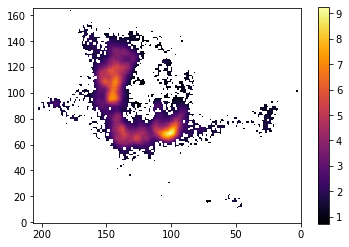

In [35]:
plt.figure(1)
plt.imshow(dataH_f, cmap='inferno')
plt.colorbar()
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

Text(0.5, 1.0, 'H$_{α}$ Flux')

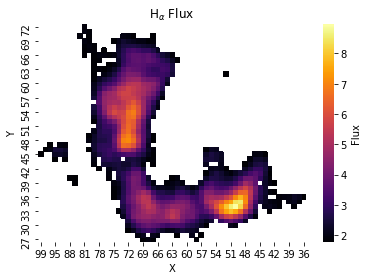

In [36]:


plt.figure(2)
datal=df.copy()
dataH_f2=(datal.round(2)).pivot(index='Y', columns='X', values='I')
sns.heatmap(dataH_f2, cmap="inferno",cbar_kws={'label': 'Flux'})
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.title('H$_{α}$ Flux')

#plt.savefig('TAURUS/Imgs/B/'+reg+'FH.png')

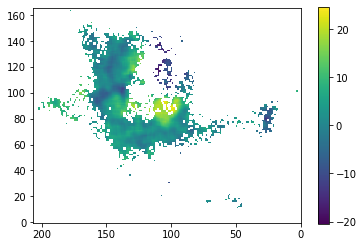

In [37]:
plt.figure(1)
plt.imshow(dataH_rv, cmap='viridis')
plt.colorbar()
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

Text(0.5, 1.0, 'H$_{α}$ Radial Velocty')

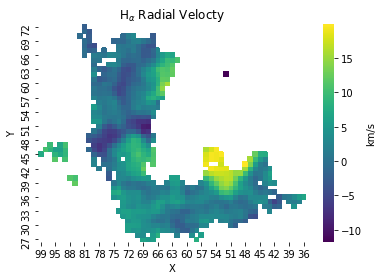

In [38]:


plt.figure(2)
datal=df.copy()
dataH_rv2=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
sns.heatmap(dataH_rv2, cmap="viridis",cbar_kws={'label': 'km/s'})
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.title('H$_{α}$ Radial Velocty')

#plt.savefig('TAURUS/Imgs/B/'+reg+'RVH.png')

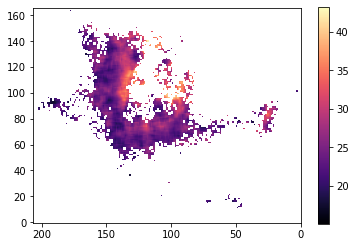

In [39]:
plt.figure(1)
plt.imshow(dataH_s, cmap='magma')
plt.colorbar()
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

Text(0.5, 1.0, 'H$_{α}$ σ$_{disp}$')

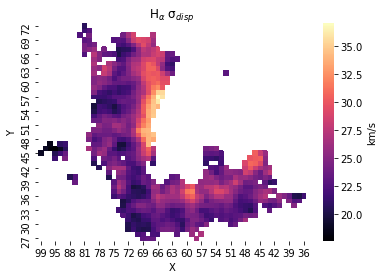

In [40]:
plt.figure(2)
datal=df.copy()
dataH_s2=(datal.round(2)).pivot(index='Y', columns='X', values='Sig')
sns.heatmap(dataH_s2, cmap="magma",cbar_kws={'label': 'km/s'})
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.title('H$_{α}$ σ$_{disp}$')

#plt.savefig('TAURUS/Imgs/B/'+reg+'SH.png')

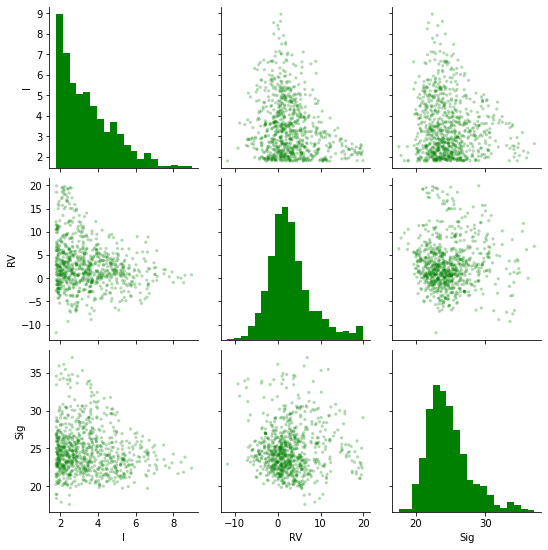

In [41]:
sns.pairplot(df, 
             vars=["I","RV","Sig"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none',color='green'),
             diag_kws=dict(bins=20,color='green'),
            )

#plt.savefig('TAURUS/'+reg+'CorrlHB.png')

Text(0.5, 1.0, 'Hα 6563$')

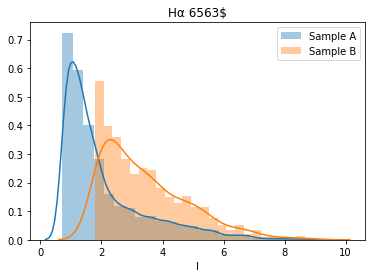

In [42]:
sns.distplot(data.I,bins=25,label='Sample A')
sns.distplot(df.I,bins=25,label='Sample B')
plt.legend()
plt.title('Hα 6563$')
#plt.savefig('TAURUS/Imgs/Hist/'+reg+'FH.png')

Text(0.5, 1.0, 'Hα 6563$')

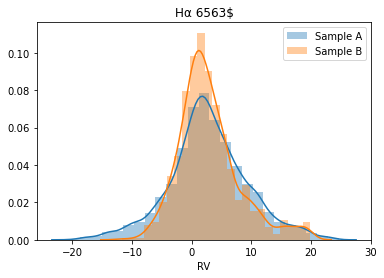

In [43]:
sns.distplot(data.RV,bins=25,label='Sample A')
sns.distplot(df.RV,bins=25,label='Sample B')
plt.legend()
plt.title('Hα 6563$')
#plt.savefig('TAURUS/Imgs/Hist/'+reg+'RVH.png')

Text(0.5, 1.0, 'Hα 6563$')

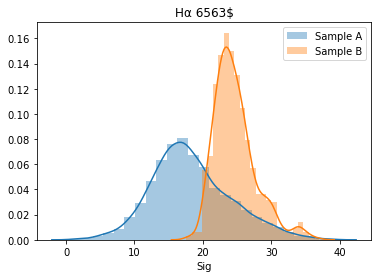

In [44]:
sns.distplot(data.Sig,bins=25,label='Sample A')
sns.distplot(df.Sig,bins=25,label='Sample B')
plt.legend()
plt.title('Hα 6563$')
#plt.savefig('TAURUS/Imgs/Hist/'+reg+'SH.png')

In [45]:
#df.to_csv('TAURUS/Data/'+reg+'Ha.csv')

In [46]:
df.to_csv('Res//595THB.csv')

In [47]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 17.307862997055054 seconds ---
